# Predicting Depression: Machine Learning Challenge

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
print('train.shape: ', train.shape, '\n','test.shape: ', test.shape)

train.shape:  (140700, 20) 
 test.shape:  (93800, 19)


In [4]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
train.tail()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [6]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [9]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


Checking the class imbalance

In [10]:
train['Depression'].value_counts(normalize=True)*100

Depression
0    81.828714
1    18.171286
Name: proportion, dtype: float64

Change data types of some features to reduce the memory usage

In [11]:
#downgrading the size of the datatypes of features
train['id'] = train['id'].astype('float32')
train['Age'] = train['Age'].astype('float32')
train['Academic Pressure'] = train['Academic Pressure'].astype('float32')
train['Work Pressure'] = train['Work Pressure'].astype('float32')
train['CGPA'] = train['CGPA'].astype('float32')
train['Study Satisfaction'] = train['Study Satisfaction'].astype('float32')
train['Job Satisfaction'] = train['Job Satisfaction'].astype('float32')
train['Work/Study Hours'] = train['Work/Study Hours'].astype('float32')
train['Financial Stress'] = train['Financial Stress'].astype('float32')
train['Depression'] = train['Depression'].astype('int8')

test['id'] = test['id'].astype('float32')
test['Age'] = test['Age'].astype('float32')
test['Academic Pressure'] = test['Academic Pressure'].astype('float32')
test['Work Pressure'] = test['Work Pressure'].astype('float32')
test['CGPA'] = test['CGPA'].astype('float32')
test['Study Satisfaction'] = test['Study Satisfaction'].astype('float32')
test['Job Satisfaction'] = test['Job Satisfaction'].astype('float32')
test['Work/Study Hours'] = test['Work/Study Hours'].astype('float32')
test['Financial Stress'] = test['Financial Stress'].astype('float32')



In [12]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  float32
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float32
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float32
 8   Work Pressure                          112782 non-null  float32
 9   CGPA                                   27898 non-null   float32
 10  Study Satisfaction                     27897 non-null   

In [13]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  float32
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float32
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float32
 8   Work Pressure                          75022 non-null  float32
 9   CGPA                                   18766 non-null  float32
 10  Study Satisfaction                     18767 non-null  float32
 11  Jo

Exploratory Data Analysis

Let's investigate null values in each column in train data 

In [14]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [15]:
train.isnull().mean()*100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [16]:
categorical_cols = train.select_dtypes(include=['object']).columns
df = pd.DataFrame(index=categorical_cols)
df['nunique'] = train[categorical_cols].nunique()
df


,nunique
Name,422
Gender,2
City,98
Working Professional or Student,2
Profession,64
Sleep Duration,36
Dietary Habits,23
Degree,115
Have you ever had suicidal thoughts ?,2
Family History of Mental Illness,2


Gender
Male      77464
Female    63236
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

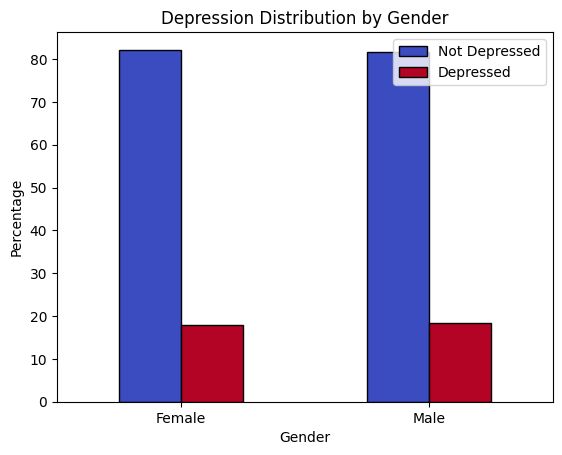

Depression          0          1
Gender                          
Female      82.176292  17.823708
Male        81.544976  18.455024


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



print(train["Gender"].value_counts())

# Grouping by Gender and Depression
gender_depression_counts = train.groupby("Gender")["Depression"].value_counts(normalize=True).unstack() * 100

# Plotting the distribution
plt.figure(figsize=(8, 5))
gender_depression_counts.plot(kind="bar",  colormap="coolwarm", edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Depression Distribution by Gender")
plt.legend(["Not Depressed", "Depressed"])
plt.xticks(rotation=0)
plt.show()

# Displaying the summary statistics
print(gender_depression_counts)


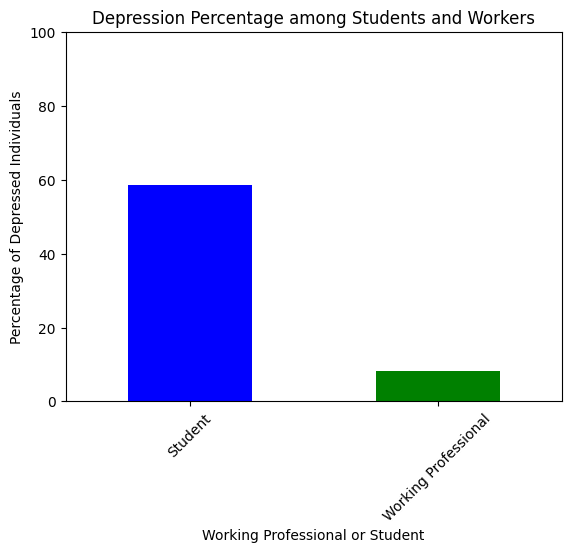

Depression                               0          1
Working Professional or Student                      
Student                          41.450127  58.549873
Working Professional             91.816417   8.183583


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame structure (Replace this with actual dataset)
# df = pd.read_csv("your_dataset.csv")

# Grouping by Profession and Depression status
profession_depression = train.groupby("Working Professional or Student")["Depression"].value_counts(normalize=True).unstack() * 100

# Plot the depression percentage in students and workers
profession_depression[1].plot(kind='bar', color=['blue', 'green'])
plt.ylabel("Percentage of Depressed Individuals")
plt.xlabel("Working Professional or Student")
plt.title("Depression Percentage among Students and Workers")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

# Display the table of percentages
print(profession_depression)


In [19]:
# Group by Family History of Mental Illness and Depression
depression_family_history = train.groupby("Family History of Mental Illness")["Depression"].value_counts(normalize=True) * 100

# Convert to DataFrame for better readability
depression_family_history = depression_family_history.unstack()

# Display the results
print(depression_family_history)


Depression                                0          1
Family History of Mental Illness                      
No                                82.461347  17.538653
Yes                               81.188699  18.811301


                                          Handling missing values in training data

In [20]:
print(train['Academic Pressure'].mean())
print(train['Work Pressure'].mean())
print(train['CGPA'].mean())
print(train['Study Satisfaction'].mean())
print(train['Job Satisfaction'].mean())
print(train['Financial Stress'].mean(), '\n\n')




print(train['Academic Pressure'].median())
print(train['Work Pressure'].median())
print(train['CGPA'].median())
print(train['Study Satisfaction'].median())
print(train['Job Satisfaction'].median())
print(train['Financial Stress'].median(), '\n\n')

print(train['Academic Pressure'].mode())
print(train['Work Pressure'].mode())
print(train['CGPA'].mode())
print(train['Study Satisfaction'].mode())
print(train['Job Satisfaction'].mode())
print(train['Financial Stress'].mode(), '\n\n')


3.1422734
2.9989982
7.6586366
2.9449403
2.9744039
2.9889834 


3.0
3.0
7.77
3.0
3.0
3.0 


0    3.0
Name: Academic Pressure, dtype: float32
0    2.0
Name: Work Pressure, dtype: float32
0    8.04
Name: CGPA, dtype: float32
0    4.0
Name: Study Satisfaction, dtype: float32
0    2.0
Name: Job Satisfaction, dtype: float32
0    2.0
Name: Financial Stress, dtype: float32 




<Axes: xlabel='Academic Pressure', ylabel='Density'>

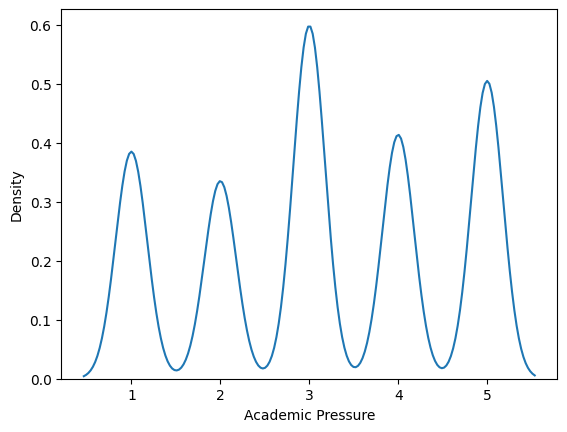

In [21]:
sns.kdeplot(data=train['Academic Pressure'])

In [22]:
train['Profession'].fillna('unknown', inplace=True)
train['Academic Pressure'].fillna(train['Academic Pressure'].mean(), inplace=True)
train['Work Pressure'].fillna(train['Work Pressure'].mean(), inplace=True)
train['CGPA'].fillna(train['CGPA'].mean(), inplace=True)
train['Study Satisfaction'].fillna(train['Study Satisfaction'].mean(), inplace=True)
train['Job Satisfaction'].fillna(train['Job Satisfaction'].mean(), inplace=True)
train['Financial Stress'].fillna(train['Job Satisfaction'].mean(), inplace=True)
train['Dietary Habits'].fillna(train['Dietary Habits'].mode()[0], inplace=True)
train['Degree'].fillna(train['Degree'].mode()[0], inplace=True)


C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\3737810036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Profession'].fillna('unknown', inplace=True)
C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\3737810036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [23]:
train.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

It seems like handling missing values worked without any problem


                              Handling missing values in Test data

In [24]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [25]:
print(test['Academic Pressure'].mean())
print(test['Work Pressure'].mean())
print(test['CGPA'].mean())
print(test['Study Satisfaction'].mean())
print(test['Job Satisfaction'].mean(), '\n\n')

print(test['Academic Pressure'].median())
print(test['Work Pressure'].median())
print(test['CGPA'].median())
print(test['Study Satisfaction'].median())
print(test['Job Satisfaction'].median(), '\n\n')

print(test['Academic Pressure'].mode())
print(test['Work Pressure'].mode())
print(test['CGPA'].mode())
print(test['Study Satisfaction'].mode())
print(test['Job Satisfaction'].mode())



3.1585763
3.0117965
7.6740165
2.9395216
2.96092 


3.0
3.0
7.8
3.0
3.0 


0    3.0
Name: Academic Pressure, dtype: float32
0    2.0
Name: Work Pressure, dtype: float32
0    8.04
Name: CGPA, dtype: float32
0    4.0
Name: Study Satisfaction, dtype: float32
0    2.0
Name: Job Satisfaction, dtype: float32


In [26]:
test['Profession'].fillna('unknown', inplace=True)
test['Academic Pressure'].fillna(test['Academic Pressure'].mean(), inplace=True)
test['Work Pressure'].fillna(test['Work Pressure'].mean(), inplace=True)
test['CGPA'].fillna(test['CGPA'].mean(), inplace=True)
test['Study Satisfaction'].fillna(test['Study Satisfaction'].mean(), inplace=True)
test['Job Satisfaction'].fillna(test['Job Satisfaction'].mean(), inplace=True)
test['Dietary Habits'].fillna(test['Dietary Habits'].mode()[0], inplace=True)
test['Degree'].fillna(test['Degree'].mode()[0], inplace=True)


C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\461010261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Profession'].fillna('unknown', inplace=True)
C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\461010261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [27]:
test.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

nice!!! now there are no missing values in test data set too.. 

In [28]:
train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

## Feature Encoding

For low cardinality categorical variables like 'Gender' , 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness' (all are with 2 categories and won't increase the dimentionality) , let's use one-hot-encoding. for this I'm here using previously defined function by myself to encode.

In [29]:
#concatenating train and test data sets
new_df = pd.concat([train, test], axis=0)

In [30]:
new_df.shape

(234500, 20)

In [31]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding_and_concat(df, column_list):
    ohe_encoder = OneHotEncoder(drop = 'first', sparse_output=False) #output will be an numpy array instead of a sparse matrix
    ohe_encoded= ohe_encoder.fit_transform(df[column_list]) #fit and transform data
    encoded_df = pd.DataFrame(data = ohe_encoded, columns=ohe_encoder.get_feature_names_out(column_list)) #get the encoded subset of df as a data frame
    encoded_df.index = df.index  # set the index of the encoded dataframe same  as the original data frame
    df = pd.concat([df, encoded_df], axis=1) # concatenation
    df = df.drop(columns=column_list) # Remove original categorical columns as they are now one-hot encoded
    return df

In [32]:
column_list = ['Gender' , 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
new_df = one_hot_encoding_and_concat(new_df, column_list)

In [33]:
new_df

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.0,Aaradhya,49.0,Ludhiana,Chef,3.142273,5.000000,7.658637,2.944940,2.000000,More than 8 hours,Healthy,BHM,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Vivan,26.0,Varanasi,Teacher,3.142273,4.000000,7.658637,2.944940,3.000000,Less than 5 hours,Unhealthy,LLB,7.0,3.0,1.0,1.0,1.0,1.0,0.0
2,2.0,Yuvraj,33.0,Visakhapatnam,unknown,5.000000,2.998998,8.970000,2.000000,2.974404,5-6 hours,Healthy,B.Pharm,3.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3.0,Yuvraj,22.0,Mumbai,Teacher,3.142273,5.000000,7.658637,2.944940,1.000000,Less than 5 hours,Moderate,BBA,10.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,Rhea,30.0,Kanpur,Business Analyst,3.142273,1.000000,7.658637,2.944940,1.000000,5-6 hours,Unhealthy,BBA,9.0,4.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495.0,Zoya,49.0,Jaipur,Pilot,3.158576,3.000000,7.674016,2.939522,5.000000,Less than 5 hours,Moderate,BSc,2.0,2.0,NaN,0.0,1.0,1.0,1.0
93796,234496.0,Shlok,29.0,Ahmedabad,Pilot,3.158576,5.000000,7.674016,2.939522,1.000000,7-8 hours,Moderate,BE,11.0,3.0,NaN,1.0,1.0,1.0,1.0
93797,234497.0,Rishi,24.0,Visakhapatnam,unknown,1.000000,3.011796,7.510000,4.000000,2.960920,7-8 hours,Moderate,B.Tech,7.0,1.0,NaN,1.0,0.0,0.0,0.0
93798,234498.0,Eshita,23.0,Kalyan,Marketing Manager,3.158576,4.000000,7.674016,2.939522,2.000000,5-6 hours,Healthy,BA,7.0,5.0,NaN,0.0,1.0,1.0,1.0


Let's clean the city column in the new_df

In [34]:
new_df['City'].value_counts().to_dict()

{'Kalyan': 10978,
 'Patna': 9812,
 'Vasai-Virar': 9662,
 'Kolkata': 9415,
 'Ahmedabad': 9290,
 'Meerut': 9189,
 'Ludhiana': 8771,
 'Rajkot': 8657,
 'Srinagar': 8621,
 'Visakhapatnam': 8592,
 'Pune': 8528,
 'Mumbai': 8095,
 'Indore': 7912,
 'Agra': 7873,
 'Vadodara': 7737,
 'Surat': 7726,
 'Varanasi': 7658,
 'Hyderabad': 7619,
 'Kanpur': 7376,
 'Jaipur': 7202,
 'Lucknow': 7140,
 'Thane': 7124,
 'Nagpur': 6957,
 'Bangalore': 6830,
 'Chennai': 6718,
 'Delhi': 6129,
 'Ghaziabad': 6106,
 'Bhopal': 5845,
 'Faridabad': 5464,
 'Nashik': 5326,
 'Mihir': 7,
 'Vidya': 7,
 'Bhavna': 6,
 'City': 5,
 'Nalini': 4,
 'Saanvi': 4,
 'Nandini': 4,
 'Keshav': 4,
 'Pratyush': 4,
 'Harsha': 3,
 'Siddhesh': 3,
 'Mahi': 3,
 'Atharv': 2,
 'Vikram': 2,
 'M.Com': 2,
 'Parth': 2,
 'MCA': 2,
 'Hrithik': 2,
 'Less Delhi': 2,
 'No': 2,
 'Molkata': 2,
 'Ayush': 2,
 'Vidhi': 2,
 'Vaishnavi': 2,
 'Malyan': 1,
 'Less than 5 hours': 1,
 'Jhanvi': 1,
 'Unirar': 1,
 'Galesabad': 1,
 'Khaziabad': 1,
 'Khushi': 1,
 'Pooja': 1

In [35]:
city_corrections = {
    'Malyan': 'Kalyan', 'Nalyan': 'Kalyan', 'Unaly': 'Kalyan', 
    'Less than 5 Kalyan': 'Kalyan',

    'Golkata': 'Kolkata', 'Molkata': 'Kolkata', 'Rolkata': 'Kolkata', 
    'Tolkata': 'Kolkata',

    'Mhopal': 'Bhopal', 'Ghopal': 'Bhopal',

    'Thani': 'Thane', 'Khaziabad': 'Ghaziabad', 'Vaikot': 'Rajkot',

    'Less Delhi': 'Delhi', 'More Delhi': 'Delhi',

    'San Vasai-Virar': 'Vasai-Virar', 'Is Kanpur': 'Kanpur',

    'Ishanabad': 'Gurgaon',  

    'Less than 5 hours': 'Unknown', 'No': 'Unknown', 'No.12': 'Unknown',

    # Fixing non-city entries
    'City': 'Unknown', 'Researcher': 'Unknown', 'Lawyer': 'Unknown', 
    'Chemist': 'Unknown',

    # Potential typos, mapping to 'Unknown'
    '3.0': 'Unknown', 'M.Com': 'Unknown', 'M.Tech': 'Unknown', 
    'MCA': 'Unknown', 'ME': 'Unknown', 'MSc': 'Unknown',

    # Names of people being mapped to 'Unknown'
    'Vidya': 'Unknown', 'Mihir': 'Unknown', 'Bhavna': 'Unknown', 
    'Saanvi': 'Unknown', 'Pratyush': 'Unknown', 'Nandini': 'Unknown', 
    'Keshav': 'Unknown', 'Nalini': 'Unknown', 'Harsha': 'Unknown', 
    'Siddhesh': 'Unknown', 'Mahi': 'Unknown', 'Vaishnavi': 'Unknown', 
    'Parth': 'Unknown', 'Atharv': 'Unknown', 'Vikram': 'Unknown', 
    'Hrithik': 'Unknown', 'Vidhi': 'Unknown', 'Ayush': 'Unknown', 
    'Raghavendra': 'Unknown', 'Aditya': 'Unknown', 'Krishna': 'Unknown', 
    'Ivaan': 'Unknown', 'Gaurav': 'Unknown', 'Krinda': 'Unknown', 
    'Vaanya': 'Unknown', 'Harsh': 'Unknown', 'Kibara': 'Unknown', 
    'Kashish': 'Unknown', 'Reyansh': 'Unknown', 'Tushar': 'Unknown', 
    'Rashi': 'Unknown', 'Kagan': 'Unknown', 'Armaan': 'Unknown', 
    'Ithal': 'Unknown', 'Ayansh': 'Unknown', 'Shrey': 'Unknown', 
    'Anvi': 'Unknown', 'Itheg': 'Unknown', 'Galesabad': 'Unknown', 
    'Dhruv': 'Unknown', 'Aaradhya': 'Unknown', 'Jhanvi': 'Unknown', 
    'Unirar': 'Unknown', 'Khushi': 'Unknown', 'Pooja': 'Unknown', 
    'Aditi': 'Unknown', 'Avni': 'Unknown', 'Ira': 'Unknown', 
    'Sara': 'Unknown', 'Leela': 'Unknown', 'Pratham': 'Unknown', 
    'Abhinav': 'Unknown'
}

new_df['City'] = new_df['City'].replace(city_corrections)

In [36]:
new_df['City'].value_counts().to_dict()

{'Kalyan': 10982,
 'Patna': 9812,
 'Vasai-Virar': 9663,
 'Kolkata': 9420,
 'Ahmedabad': 9290,
 'Meerut': 9189,
 'Ludhiana': 8771,
 'Rajkot': 8658,
 'Srinagar': 8621,
 'Visakhapatnam': 8592,
 'Pune': 8528,
 'Mumbai': 8095,
 'Indore': 7912,
 'Agra': 7873,
 'Vadodara': 7737,
 'Surat': 7726,
 'Varanasi': 7658,
 'Hyderabad': 7619,
 'Kanpur': 7377,
 'Jaipur': 7202,
 'Lucknow': 7140,
 'Thane': 7125,
 'Nagpur': 6957,
 'Bangalore': 6830,
 'Chennai': 6718,
 'Delhi': 6132,
 'Ghaziabad': 6107,
 'Bhopal': 5847,
 'Faridabad': 5464,
 'Nashik': 5326,
 'Unknown': 117,
 'Gurgaon': 2,
 'Aishwarya': 1,
 'Malyansh': 1,
 'Plata': 1,
 'Mira': 1,
 'Moreadhyay': 1,
 'Morena': 1,
 'Ishkarsh': 1,
 'Kashk': 1,
 'Chhavi': 1,
 'Saurav': 1}

There are some out liers. Let's classify them into 'unknown'

In [37]:
threashold = 10

city_counts = new_df['City'].value_counts()
new_df['City'] = new_df['City'].apply(lambda c: c if city_counts[c] >= threashold else "Unknown" )

In [38]:
new_df['City'].value_counts().to_dict()

{'Kalyan': 10982,
 'Patna': 9812,
 'Vasai-Virar': 9663,
 'Kolkata': 9420,
 'Ahmedabad': 9290,
 'Meerut': 9189,
 'Ludhiana': 8771,
 'Rajkot': 8658,
 'Srinagar': 8621,
 'Visakhapatnam': 8592,
 'Pune': 8528,
 'Mumbai': 8095,
 'Indore': 7912,
 'Agra': 7873,
 'Vadodara': 7737,
 'Surat': 7726,
 'Varanasi': 7658,
 'Hyderabad': 7619,
 'Kanpur': 7377,
 'Jaipur': 7202,
 'Lucknow': 7140,
 'Thane': 7125,
 'Nagpur': 6957,
 'Bangalore': 6830,
 'Chennai': 6718,
 'Delhi': 6132,
 'Ghaziabad': 6107,
 'Bhopal': 5847,
 'Faridabad': 5464,
 'Nashik': 5326,
 'Unknown': 129}

In [39]:
new_df['Degree'].value_counts().to_dict()

{'Class 12': 24545,
 'B.Ed': 19453,
 'B.Arch': 14779,
 'B.Com': 13552,
 'B.Pharm': 9843,
 'BCA': 9608,
 'M.Ed': 9375,
 'MCA': 8672,
 'BBA': 8417,
 'BSc': 8341,
 'MSc': 7975,
 'LLM': 7780,
 'M.Pharm': 7532,
 'M.Tech': 7492,
 'B.Tech': 7310,
 'LLB': 7286,
 'BHM': 7081,
 'MBA': 6288,
 'BA': 6240,
 'ME': 6023,
 'MD': 5672,
 'MHM': 5435,
 'BE': 5270,
 'M.Com': 5222,
 'PhD': 5176,
 'MBBS': 5115,
 'MA': 4820,
 'M.Arch': 14,
 'B.Sc': 7,
 'BPharm': 5,
 'M': 5,
 'B': 4,
 'BTech': 4,
 'UX/UI Designer': 4,
 'S.Pharm': 3,
 'Kalyan': 3,
 'MPharm': 3,
 'BArch': 3,
 'Degree': 3,
 'Bhopal': 3,
 'BEd': 3,
 'RCA': 2,
 'LL B.Ed': 2,
 'B.M.Com': 2,
 'Jhanvi': 2,
 'Advait': 2,
 'M.UI': 2,
 'BH': 2,
 'Vrinda': 2,
 'LLBA': 2,
 'MEd': 2,
 'Nalini': 2,
 'Navya': 2,
 'L.Ed': 2,
 'K.Ed': 2,
 'Eshita': 2,
 'Business Analyst': 2,
 'P.Com': 2,
 '20': 2,
 '3.0': 2,
 'Mechanical Engineer': 1,
 'Vibha': 1,
 'B BCA': 1,
 'B.Press': 1,
 'B.H': 1,
 '8.95': 1,
 'A.Ed': 1,
 'B.Study_Hours': 1,
 'B. Gender': 1,
 'M.': 1,
 'M

In [40]:
degree_corrections = {
    # Standardizing common degrees
    'BTech': 'B.Tech', 'B Tech': 'B.Tech', 'B.Tech.': 'B.Tech',
    'M_Tech': 'M.Tech', 'MTech': 'M.Tech',
    'BCom': 'B.Com', 'B.Com.': 'B.Com', 'B_Com': 'B.Com',
    'MCom': 'M.Com', 'M.Com.': 'M.Com',
    'BSc': 'B.Sc', 'B.Sc.': 'B.Sc',
    'MSc': 'M.Sc', 'M.Sc.': 'M.Sc',
    'MBA.': 'MBA', 'MCA.': 'MCA', 'BBA.': 'BBA', 'BE.': 'BE',

    # Fixing inconsistent LLB, LLM
    'LLBA': 'LLB', 'LL B.Ed': 'LLB', 'LLTech': 'LLB', 'LL.Com': 'LLB',

    # Mapping low-frequency degrees to common ones
    'B.Pharm': 'B.Pharm', 'BPharm': 'B.Pharm', 'P.Pharm': 'B.Pharm',
    'M.Pharm': 'M.Pharm', 'MPharm': 'M.Pharm',
    'B.Arch': 'B.Arch', 'M.Arch': 'M.Arch',
    'B.Ed': 'B.Ed', 'M.Ed': 'M.Ed',

    # Fixing business degrees
    'B BA': 'BBA', 'B.BA': 'BBA', 'B BBA': 'BBA',
    'B B.Com': 'B.Com', 'B.M.Com': 'B.Com',

    # Fixing healthcare degrees
    'MD.': 'MD', 'MBBS.': 'MBBS',
    
    # Removing non-degree values
    'Doctor': 'Other', 'Mechanical Engineer': 'Other',
    'HR Manager': 'Other', 'Plumber': 'Other',
    'Data Scientist': 'Other', 'Entrepreneur': 'Other',
    'Working Professional': 'Other',
    
    # Handling unknown values
    '0': 'Unknown', '3.0': 'Unknown', '5.61': 'Unknown',
    'Class 11': 'Unknown', 'Class 12': 'High School',
}


In [41]:
#applying the cleaning
new_df['Degree'] = new_df['Degree'].replace(degree_corrections)
new_df['Degree'] = new_df['Degree'].apply(lambda c: c if c in degree_corrections.values() else 'Other')

In [42]:
new_df['Degree'].value_counts().to_dict()

{'Other': 52308,
 'High School': 24545,
 'B.Ed': 19453,
 'B.Arch': 14779,
 'B.Com': 13556,
 'B.Pharm': 9849,
 'M.Ed': 9375,
 'MCA': 8672,
 'BBA': 8419,
 'B.Sc': 8348,
 'M.Sc': 7975,
 'M.Pharm': 7535,
 'M.Tech': 7494,
 'B.Tech': 7314,
 'LLB': 7292,
 'MBA': 6288,
 'MD': 5672,
 'BE': 5270,
 'M.Com': 5222,
 'MBBS': 5115,
 'M.Arch': 14,
 'Unknown': 5}

Let's merge similar categories together.

In [43]:
#grouping post graduate degrees together
postgrad_degrees = ["M.Ed", "MCA", "M.Sc", "M.Pharm", "M.Tech", "M.Com", "MBA", "MD", "M.Arch"]
new_df['Degree'] = new_df['Degree'].apply(lambda c : 'PhD' if c in postgrad_degrees else c )

#grouping medical degrees together
medical_degrees = ["MBBS", "MD", "B.Pharm", "M.Pharm"]
new_df['Degree'] = new_df['Degree'].apply(lambda c : 'Medical' if c in medical_degrees else c)

#grouping engineering together
engineering_degrees = ["B.Tech", "BE", "M.Tech"]
new_df['Degree'] = new_df['Degree'].apply(lambda c: 'Eng' if c in engineering_degrees else c)


In [44]:
#replace 'unknown' with 'other'
new_df['Degree'] = new_df['Degree'].replace('Unknown', 'Other')

In [45]:
new_df['Degree'].value_counts().to_dict()

{'PhD': 58247,
 'Other': 52313,
 'High School': 24545,
 'B.Ed': 19453,
 'Medical': 14964,
 'B.Arch': 14779,
 'B.Com': 13556,
 'Eng': 12584,
 'BBA': 8419,
 'B.Sc': 8348,
 'LLB': 7292}

In [46]:
new_df['Dietary Habits'].value_counts().to_dict()

{'Moderate': 82732,
 'Unhealthy': 77013,
 'Healthy': 74707,
 'No': 8,
 'More Healthy': 4,
 'Indoor': 2,
 'Male': 2,
 'Yes': 2,
 '1.0': 2,
 'Less Healthy': 2,
 'Academic': 1,
 'Resistant': 1,
 'MCA': 1,
 '5 Healthy': 1,
 'Educational': 1,
 'Prachi': 1,
 'Soham': 1,
 '5 Unhealthy': 1,
 'Vivaan': 1,
 'Raghav': 1,
 'Naina': 1,
 'Mealy': 1,
 'Pratham': 1,
 '2': 1,
 'Class 12': 1,
 'BSc': 1,
 'Vegas': 1,
 'M.Tech': 1,
 'No Healthy': 1,
 'Electrician': 1,
 'Hormonal': 1,
 'Mihir': 1,
 'Less than Healthy': 1,
 '3': 1,
 'Gender': 1,
 'Kolkata': 1}

Cleaning the Dietary Habits column

In [47]:
dietary_mapping = {
    "More Healthy": "Healthy",
    "5 Healthy": "Healthy",
    "Less Healthy": "Moderate",
    "Less than Healthy": "Moderate",
    "No Healthy": "Unhealthy",
    "5 Unhealthy": "Unhealthy"
}

#apply the mapping
new_df['Dietary Habits'] = new_df['Dietary Habits'].replace(dietary_mapping)

#replace irrelevant values with 'Unknown' 
valid_dietary_categories = ['Healthy', 'Moderate', 'Unhealthy']
new_df['Dietary Habits'] = new_df['Dietary Habits'].apply(lambda x: x if x in valid_dietary_categories else 'Unknown' )

In [48]:
new_df['Dietary Habits'].value_counts().to_dict()

{'Moderate': 82735, 'Unhealthy': 77015, 'Healthy': 74712, 'Unknown': 38}

In [49]:
new_df['Profession'].value_counts().to_dict()

{'unknown': 61262,
 'Teacher': 41291,
 'Content Writer': 13001,
 'Architect': 7352,
 'Consultant': 7149,
 'HR Manager': 6623,
 'Pharmacist': 6549,
 'Doctor': 5453,
 'Business Analyst': 5347,
 'Chemist': 4934,
 'Entrepreneur': 4903,
 'Chef': 4706,
 'Educational Consultant': 4679,
 'Data Scientist': 3972,
 'Researcher': 3824,
 'Lawyer': 3709,
 'Customer Support': 3477,
 'Pilot': 3361,
 'Marketing Manager': 3260,
 'Travel Consultant': 3048,
 'Judge': 2901,
 'Manager': 2892,
 'Sales Executive': 2878,
 'Plumber': 2871,
 'Electrician': 2703,
 'Financial Analyst': 2622,
 'Software Engineer': 2512,
 'Civil Engineer': 2408,
 'UX/UI Designer': 2367,
 'Digital Marketer': 2314,
 'Finanancial Analyst': 2223,
 'Accountant': 2192,
 'Mechanical Engineer': 1977,
 'Graphic Designer': 1883,
 'Research Analyst': 1113,
 'Investment Banker': 650,
 'Student': 15,
 'Unemployed': 5,
 'Working Professional': 5,
 'Academic': 5,
 'Profession': 4,
 'Yogesh': 4,
 'LLM': 3,
 'BCA': 3,
 'PhD': 3,
 'B.Ed': 3,
 'MD': 2

Cleaning the 'Profession' column

In [50]:
#standardize similar professions and correct typos
corrections = {
    "Finanancial Analyst": "Financial Analyst",
    "Medical Doctor": "Doctor",
    "Research Analyst": "Researcher",
    "City Consultant": "Consultant",
    "Family Consultant": "Consultant",
    "Analyst": "Business Analyst",
    "City Manager": "Manager",
    "Surgeon": "Doctor",
    "Academic": "Teacher"
}

#remove irrelevant values
invalid_professions = ["Yogesh", "Pranav", "Yuvraj", "Surat", "Nagpur", "Patna", "LLM", "PhD",
                       "B.Ed", "BCA", "Unveil", "MBA", "MD", "M.Ed", "BBA", "BE", "3M", "24th",
                       "Name", "MCA", "M.Tech", "M.Pharm", "No", "Moderate", "Unhealthy","B.Com",
                       "B.Pharm", "MBBS", "ME", "Visakhapatnam", "FamilyVirar", "Dev", "Samar", "Manvi", "Simran",
                       "Working Professional", "Profession", ""]

#applying corrections and remove invalids
new_df['Profession'] = new_df['Profession'].replace(corrections)
new_df['Profession'] = new_df['Profession'].apply(lambda x: 'Other' if x in invalid_professions else x)

In [51]:
new_df['Profession'].value_counts().to_dict()

{'unknown': 61262,
 'Teacher': 41296,
 'Content Writer': 13001,
 'Architect': 7352,
 'Consultant': 7151,
 'HR Manager': 6623,
 'Pharmacist': 6549,
 'Doctor': 5455,
 'Business Analyst': 5349,
 'Researcher': 4937,
 'Chemist': 4934,
 'Entrepreneur': 4903,
 'Financial Analyst': 4845,
 'Chef': 4706,
 'Educational Consultant': 4679,
 'Data Scientist': 3972,
 'Lawyer': 3709,
 'Customer Support': 3477,
 'Pilot': 3361,
 'Marketing Manager': 3260,
 'Travel Consultant': 3048,
 'Judge': 2901,
 'Manager': 2893,
 'Sales Executive': 2878,
 'Plumber': 2871,
 'Electrician': 2703,
 'Software Engineer': 2512,
 'Civil Engineer': 2408,
 'UX/UI Designer': 2367,
 'Digital Marketer': 2314,
 'Accountant': 2192,
 'Mechanical Engineer': 1977,
 'Graphic Designer': 1883,
 'Investment Banker': 650,
 'Other': 62,
 'Student': 15,
 'Unemployed': 5}

In [52]:
new_df['Sleep Duration'].value_counts().to_dict()

{'Less than 5 hours': 64445,
 '7-8 hours': 61460,
 'More than 8 hours': 54916,
 '5-6 hours': 53546,
 '6-7 hours': 15,
 '3-4 hours': 15,
 '4-5 hours': 13,
 '2-3 hours': 9,
 '8-9 hours': 8,
 '4-6 hours': 7,
 '1-6 hours': 6,
 'No': 4,
 '6-8 hours': 4,
 '9-5': 3,
 '9-11 hours': 3,
 '1-2 hours': 3,
 'Unhealthy': 3,
 '9-5 hours': 3,
 'Sleep_Duration': 2,
 'Meerut': 2,
 '3-6 hours': 2,
 'than 5 hours': 2,
 '10-6 hours': 2,
 '45': 2,
 '1-3 hours': 2,
 '9-6 hours': 2,
 '10-11 hours': 2,
 '8-89 hours': 1,
 'Have_you_ever_had_suicidal_thoughts': 1,
 'Vivan': 1,
 '20-21 hours': 1,
 '60-65 hours': 1,
 '6 hours': 1,
 '50-75 hours': 1,
 '0': 1,
 '35-36 hours': 1,
 'Pune': 1,
 '45-48 hours': 1,
 'Work_Study_Hours': 1,
 '49 hours': 1,
 '8 hours': 1,
 'Indore': 1,
 '55-66 hours': 1,
 'Moderate': 1,
 '40-45 hours': 1,
 '9-10 hours': 1}

Cleaning the 'Sleep Duration' Column

In [53]:
# Standardizing sleep duration categories
sleep_corrections = {
    "6-8 hours": "7-8 hours",
    "8 hours": "7-8 hours",
    "6-7 hours": "7-8 hours",
    "9-6 hours": "7-8 hours",
    "6 hours": "6-7 hours",
    "8-9 hours": "More than 8 hours",
    "9-10 hours": "More than 8 hours",
    "10-11 hours": "More than 8 hours",
    "9-11 hours": "More than 8 hours",
    "10-6 hours": "More than 8 hours",
    "3-4 hours": "Less than 5 hours",
    "4-5 hours": "Less than 5 hours",
    "2-3 hours": "Less than 5 hours",
    "1-3 hours": "Less than 5 hours",
    "1-2 hours": "Less than 5 hours",
    "8-89 hours": "More than 8 hours",
    "1-6 hours": "Less than 5 hours",
    "4-6 hours": "Less than 5 hours",
    "3-6 hours": "Less than 5 hours",
    
}

# Removing irrelevant entries
invalid_sleep_values = ["Meerut", "Indore", "Pune", "Unhealthy", "Moderate", "Work_Study_Hours",
                        "9-5", "9-5 hours", "45", "49 hours", "60-65 hours", 
                        "Have_you_ever_had_suicidal_thoughts", "40-45 hours", "50-75 hours", "55-66 hours", "0", "Vivan", "45-48 hours",
                        "35-36 hours", "Sleep_Duration", "No", "20-21 hour", "20-21 hours", "than 5 hours", ]

# Apply corrections
new_df["Sleep Duration"] = new_df["Sleep Duration"].replace(sleep_corrections)

# Remove invalid values by setting them as "Unknown"
new_df["Sleep Duration"] = new_df["Sleep Duration"].apply(lambda x: "Unknown" if x in invalid_sleep_values else x)


In [54]:
new_df['Sleep Duration'].value_counts().to_dict()

{'Less than 5 hours': 64502,
 '7-8 hours': 61482,
 'More than 8 hours': 54933,
 '5-6 hours': 53546,
 'Unknown': 36,
 '6-7 hours': 1}

In [55]:
new_df

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.0,Aaradhya,49.0,Ludhiana,Chef,3.142273,5.000000,7.658637,2.944940,2.000000,More than 8 hours,Healthy,Other,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Vivan,26.0,Varanasi,Teacher,3.142273,4.000000,7.658637,2.944940,3.000000,Less than 5 hours,Unhealthy,LLB,7.0,3.0,1.0,1.0,1.0,1.0,0.0
2,2.0,Yuvraj,33.0,Visakhapatnam,unknown,5.000000,2.998998,8.970000,2.000000,2.974404,5-6 hours,Healthy,Medical,3.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3.0,Yuvraj,22.0,Mumbai,Teacher,3.142273,5.000000,7.658637,2.944940,1.000000,Less than 5 hours,Moderate,BBA,10.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,Rhea,30.0,Kanpur,Business Analyst,3.142273,1.000000,7.658637,2.944940,1.000000,5-6 hours,Unhealthy,BBA,9.0,4.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495.0,Zoya,49.0,Jaipur,Pilot,3.158576,3.000000,7.674016,2.939522,5.000000,Less than 5 hours,Moderate,B.Sc,2.0,2.0,NaN,0.0,1.0,1.0,1.0
93796,234496.0,Shlok,29.0,Ahmedabad,Pilot,3.158576,5.000000,7.674016,2.939522,1.000000,7-8 hours,Moderate,Eng,11.0,3.0,NaN,1.0,1.0,1.0,1.0
93797,234497.0,Rishi,24.0,Visakhapatnam,unknown,1.000000,3.011796,7.510000,4.000000,2.960920,7-8 hours,Moderate,Eng,7.0,1.0,NaN,1.0,0.0,0.0,0.0
93798,234498.0,Eshita,23.0,Kalyan,Marketing Manager,3.158576,4.000000,7.674016,2.939522,2.000000,5-6 hours,Healthy,Other,7.0,5.0,NaN,0.0,1.0,1.0,1.0


Cleaning version 1.0 is done!!!

Encoding the cleaned data

Encoding the 'Sleep Duration' and 'Dietary Habits' columns using ordinal encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder

sleep_categories = ['More than 8 hours', '7-8 hours', '5-6 hours', 'Less than 5 hours', 'Unknown']
ord_encoder = OrdinalEncoder(categories=[sleep_categories], handle_unknown='use_encoded_value', unknown_value=-1)
new_df['Sleep Duration'] = ord_encoder.fit_transform(new_df[['Sleep Duration']])

Dietary_categories = ['Healthy', 'Moderate', 'Unhealthy',  'Unknown']
ord_encoder = OrdinalEncoder(categories=[Dietary_categories], handle_unknown='use_encoded_value', unknown_value=-1 )
new_df['Dietary Habits'] = ord_encoder.fit_transform(new_df[['Dietary Habits']])


In [57]:
new_df

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.0,Aaradhya,49.0,Ludhiana,Chef,3.142273,5.000000,7.658637,2.944940,2.000000,0.0,0.0,Other,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Vivan,26.0,Varanasi,Teacher,3.142273,4.000000,7.658637,2.944940,3.000000,3.0,2.0,LLB,7.0,3.0,1.0,1.0,1.0,1.0,0.0
2,2.0,Yuvraj,33.0,Visakhapatnam,unknown,5.000000,2.998998,8.970000,2.000000,2.974404,2.0,0.0,Medical,3.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3.0,Yuvraj,22.0,Mumbai,Teacher,3.142273,5.000000,7.658637,2.944940,1.000000,3.0,1.0,BBA,10.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,Rhea,30.0,Kanpur,Business Analyst,3.142273,1.000000,7.658637,2.944940,1.000000,2.0,2.0,BBA,9.0,4.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495.0,Zoya,49.0,Jaipur,Pilot,3.158576,3.000000,7.674016,2.939522,5.000000,3.0,1.0,B.Sc,2.0,2.0,NaN,0.0,1.0,1.0,1.0
93796,234496.0,Shlok,29.0,Ahmedabad,Pilot,3.158576,5.000000,7.674016,2.939522,1.000000,1.0,1.0,Eng,11.0,3.0,NaN,1.0,1.0,1.0,1.0
93797,234497.0,Rishi,24.0,Visakhapatnam,unknown,1.000000,3.011796,7.510000,4.000000,2.960920,1.0,1.0,Eng,7.0,1.0,NaN,1.0,0.0,0.0,0.0
93798,234498.0,Eshita,23.0,Kalyan,Marketing Manager,3.158576,4.000000,7.674016,2.939522,2.000000,2.0,0.0,Other,7.0,5.0,NaN,0.0,1.0,1.0,1.0


encoding the 'Profession' and 'city' , 'Degree' column using the Label encoding

In [58]:
new_df

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.0,Aaradhya,49.0,Ludhiana,Chef,3.142273,5.000000,7.658637,2.944940,2.000000,0.0,0.0,Other,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Vivan,26.0,Varanasi,Teacher,3.142273,4.000000,7.658637,2.944940,3.000000,3.0,2.0,LLB,7.0,3.0,1.0,1.0,1.0,1.0,0.0
2,2.0,Yuvraj,33.0,Visakhapatnam,unknown,5.000000,2.998998,8.970000,2.000000,2.974404,2.0,0.0,Medical,3.0,1.0,1.0,1.0,0.0,1.0,0.0
3,3.0,Yuvraj,22.0,Mumbai,Teacher,3.142273,5.000000,7.658637,2.944940,1.000000,3.0,1.0,BBA,10.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,Rhea,30.0,Kanpur,Business Analyst,3.142273,1.000000,7.658637,2.944940,1.000000,2.0,2.0,BBA,9.0,4.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495.0,Zoya,49.0,Jaipur,Pilot,3.158576,3.000000,7.674016,2.939522,5.000000,3.0,1.0,B.Sc,2.0,2.0,NaN,0.0,1.0,1.0,1.0
93796,234496.0,Shlok,29.0,Ahmedabad,Pilot,3.158576,5.000000,7.674016,2.939522,1.000000,1.0,1.0,Eng,11.0,3.0,NaN,1.0,1.0,1.0,1.0
93797,234497.0,Rishi,24.0,Visakhapatnam,unknown,1.000000,3.011796,7.510000,4.000000,2.960920,1.0,1.0,Eng,7.0,1.0,NaN,1.0,0.0,0.0,0.0
93798,234498.0,Eshita,23.0,Kalyan,Marketing Manager,3.158576,4.000000,7.674016,2.939522,2.000000,2.0,0.0,Other,7.0,5.0,NaN,0.0,1.0,1.0,1.0


In [59]:
train = new_df[new_df['id']<140700]
test = new_df[new_df['id'] >= 140700]
test = test.drop(columns=['Depression'])

Remove 'Name' column from the train and test data sets

In [60]:
train = train.drop(columns=['Name'])
test = test.drop(columns=['Name'])

               Encoding 'City', 'Profession', 'Degree' columns using the target encoding

In [61]:

# Define categorical features for target encoding
cat_features = ['Degree', 'City', 'Profession']

# Apply Target Encoding
for col in cat_features:
    # Compute mean target value per category using the training data
    target_mean = train.groupby(col)['Depression'].mean()
    
    # Replace categorical values with their corresponding mean depression value
    train[col] = train[col].map(target_mean)
    test[col] = test[col].map(target_mean)

    # Handle unseen categories in test by filling NaN with overall mean of the target
    overall_mean = train['Depression'].mean()
    test[col].fillna(overall_mean, inplace=True)


C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\1824605151.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(overall_mean, inplace=True)
C:\Users\yugan\AppData\Local\Temp\ipykernel_6408\1824605151.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

encoding is done!!!!

Scaling  train and test data


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to scale
cols_to_scale = ['Job Satisfaction', 'Study Satisfaction', 'CGPA', 
                 'Academic Pressure', 'Work Pressure', 'Financial Stress', 'Age', 'Work/Study Hours']

minmax_scaler = MinMaxScaler()

# Fit and transform on training data
train[cols_to_scale] = minmax_scaler.fit_transform(train[cols_to_scale])

# Apply the same transformation to test data
test[cols_to_scale] = minmax_scaler.transform(test[cols_to_scale])


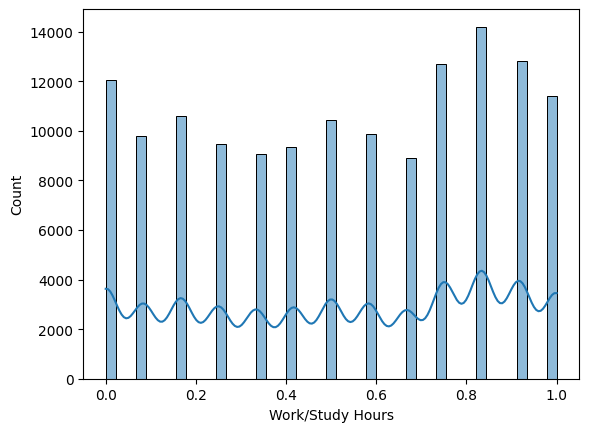

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.histplot(data=train['Work/Study Hours'], kde=True)
plt.show()

In [64]:
train

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.0,0.738095,0.192690,0.048567,0.535568,1.00000,0.528901,0.486235,0.250000,0.0,0.0,0.139245,0.083333,0.25,0.0,0.0,1.0,0.0,0.0
1,1.0,0.190476,0.142206,0.055638,0.535568,0.75000,0.528901,0.486235,0.500000,3.0,2.0,0.150896,0.583333,0.50,1.0,1.0,1.0,1.0,0.0
2,2.0,0.357143,0.159196,0.534944,1.000000,0.49975,0.792757,0.250000,0.493601,2.0,0.0,0.136786,0.250000,0.00,1.0,1.0,0.0,1.0,0.0
3,3.0,0.095238,0.131293,0.055638,0.535568,1.00000,0.528901,0.486235,0.000000,3.0,1.0,0.134367,0.833333,0.00,1.0,1.0,1.0,1.0,1.0
4,4.0,0.285714,0.125739,0.056610,0.535568,0.00000,0.528901,0.486235,0.000000,2.0,2.0,0.134367,0.750000,0.75,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695.0,0.000000,0.217887,0.534944,0.535568,1.00000,0.528901,0.486235,0.750000,2.0,2.0,0.512525,0.166667,0.75,1.0,0.0,1.0,0.0,1.0
140696,140696.0,0.547619,0.275133,0.018684,0.535568,1.00000,0.528901,0.486235,0.750000,1.0,1.0,0.204144,0.500000,1.00,0.0,0.0,1.0,1.0,1.0
140697,140697.0,0.142857,0.173577,0.050607,0.535568,0.50000,0.528901,0.486235,0.000000,0.0,1.0,0.155657,0.333333,0.75,0.0,0.0,1.0,0.0,0.0
140698,140698.0,0.738095,0.211667,0.064073,0.535568,1.00000,0.528901,0.486235,0.250000,2.0,1.0,0.139245,0.833333,0.00,0.0,0.0,1.0,1.0,0.0


<Axes: >

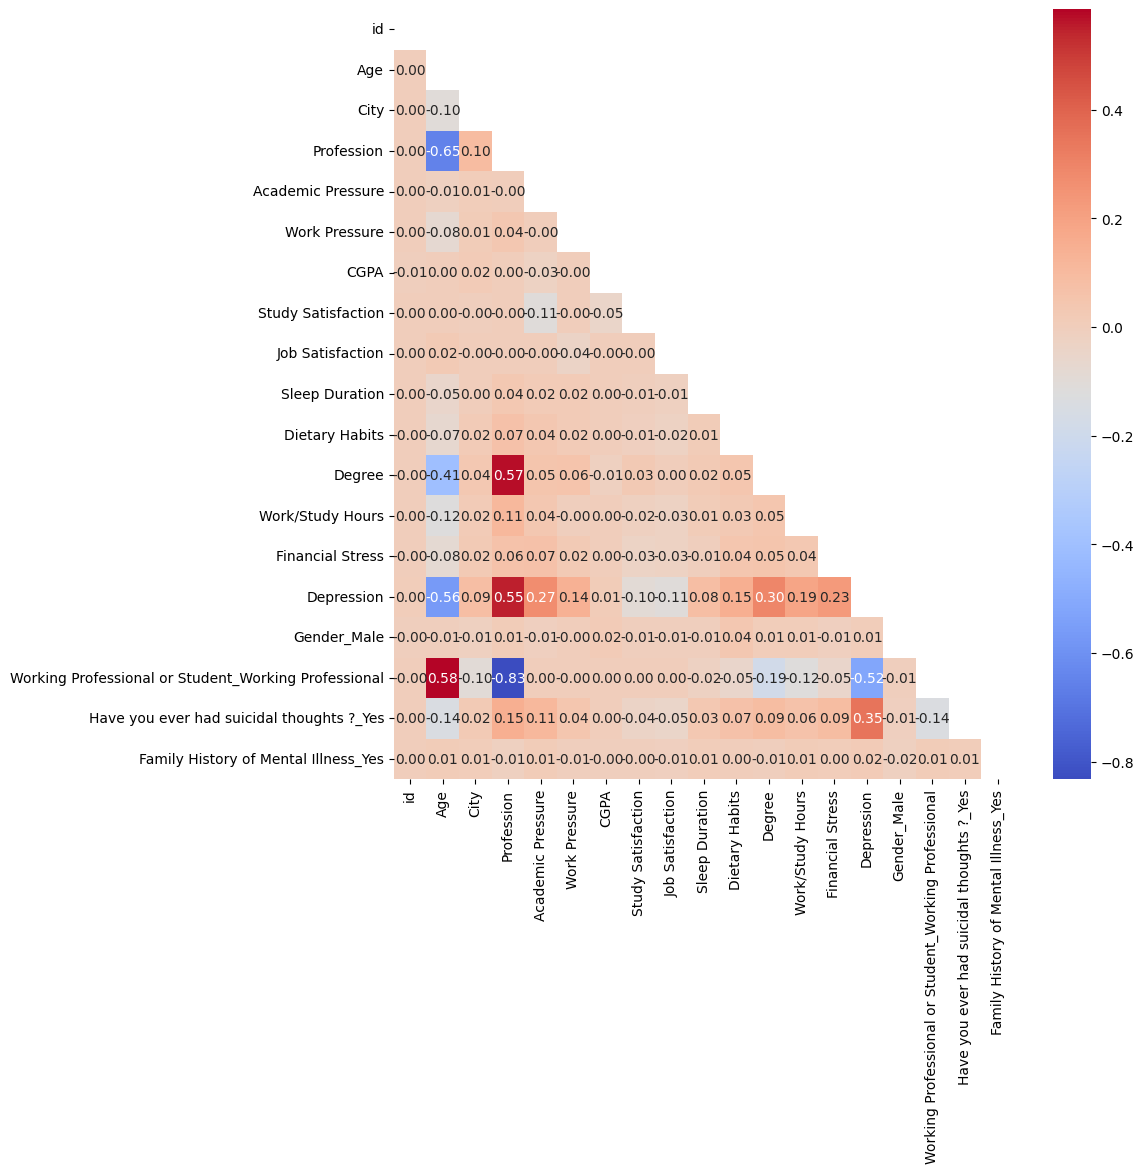

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

cor_mat = train.corr(method='pearson')
mask = np.triu(np.ones_like(cor_mat))
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat, annot=True, fmt='.2f', cmap="coolwarm", mask=mask)

Train-Valid split

In [66]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Depression'], axis=1)
y = train['Depression']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Training the model 

01. Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression( warm_start=True, max_iter=100, random_state=42)

for i in range(100,1000, 100):
    log_reg.set_params(max_iter=i)
    log_reg.fit(X_train, y_train) #train the model
    y_pred = log_reg.predict(X_valid) #predict using the validation set
    accuracy = accuracy_score(y_valid, y_pred) #compute the accuracy score
    print(f"Iteration {i}: Accuracy = {accuracy:.6f}")

d:\myglobalenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 100: Accuracy = 0.895522


d:\myglobalenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 200: Accuracy = 0.935501


d:\myglobalenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 300: Accuracy = 0.936923


d:\myglobalenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 400: Accuracy = 0.937349
Iteration 500: Accuracy = 0.937704
Iteration 600: Accuracy = 0.937669
Iteration 700: Accuracy = 0.937669
Iteration 800: Accuracy = 0.937669
Iteration 900: Accuracy = 0.937669


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=400, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.9359


In [ ]:
#now run the model on the test data
y_test_pred = rf.predict(test)

In [ ]:
#creating the submission file

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_pred  
})

submission.to_csv("submission6.csv", index=False)

print("Submission file saved successfully!")


Train the model with the xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = xgb.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"🎯 XGBoost Accuracy: {accuracy:.4f}")


In [ ]:
y_test_pred = xgb.predict(test)

In [ ]:
#creating the submission file

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_pred  
})

submission.to_csv("submission7.csv", index=False)

print("Submission file saved successfully!")

Train the model with the Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=5)  
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))


In [ ]:
y_test_pred = model.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_pred  
})

submission.to_csv("submission8.csv", index=False)

print("Submission file saved successfully!")

Train with the XGboost(XGBClassifier)

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgbmodel = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgbmodel.fit(X_train, y_train)

# Evaluate
y_pred = xgbmodel.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))


In [ ]:
y_pred =xgbmodel.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_pred  
})

submission.to_csv("submission9.csv", index=False)

print("Submission file saved successfully!")


Train the model with SVM

In [ ]:
from sklearn.svm import SVC

# Train SVM
svcmodel = SVC(random_state=42, kernel='rbf', probability=True)
svcmodel.fit(X_train, y_train)

# Evaluate
y_pred = svcmodel.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_pred))


In [ ]:
y_pred_svc =svcmodel.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_pred_svc  
})

submission.to_csv("submission9.csv", index=False)

print("Submission file saved successfully!")

Let's use the Optuna Hyperparameter Optimer for optimizing the above algorithms

Training model with Random Forest Classifier with Optuna Hyperparamter Optimizer

In [67]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 30, step=5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])

    # Train model with suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    
    # Use cross-validation to evaluate performance
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    
    return scores.mean()  # Return mean accuracy


# Run Optuna optimization
study = optuna.create_study(direction="maximize")  # We want to maximize accuracy
study.optimize(objective, n_trials=100)  # Try 50 different sets of parameters

# Print best parameters and best score
print("Best Parameters:", study.best_params)
print("Best Accuracy:", study.best_value)

# Train final model using best parameters
best_params = study.best_params
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predict on validation set
y_valid_pred = best_rf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy:.4f}")

[I 2025-03-14 09:55:39,837] A new study created in memory with name: no-name-3fc632bd-8e0f-4306-bb04-eddbe6cc3920
[I 2025-03-14 09:55:53,524] Trial 0 finished with value: 0.9368692253020612 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.9368692253020612.
[I 2025-03-14 09:56:20,729] Trial 1 finished with value: 0.937180170575693 and parameters: {'n_estimators': 250, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.937180170575693.
[I 2025-03-14 09:56:37,249] Trial 2 finished with value: 0.9374111584932481 and parameters: {'n_estimators': 150, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.9374111584932481.
[I 2025-03-14 09:56:53,529] Trial 3 finished with value: 0.9370469083155649 and parameters: {'n_estimators': 150, 'max_depth': 30, 'mi

Best Parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Accuracy: 0.9374200426439232
Validation Accuracy with Best Parameters: 0.9369


In [ ]:
#predict on the test set and create the submission file
y_test_pred = best_rf.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_pred  
})

submission.to_csv("submission10.csv", index=False)

print("Submission file saved successfully!")

                                                    Training the model with XGBoost with optuna optimizer

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
    }

    model = XGBClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

print("Best Parameters:", study.best_params)

#Train Final XGBoost Model with Best Parameters
best_params = study.best_params
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

#Evaluate Model Performance
y_pred = best_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("\nBest Hyperparameters from Optuna:")
print(best_params)
print(f"Optimized XGBoost Accuracy: {accuracy:.4f}")


In [ ]:
y_test_pred_xgb = best_model.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_pred_xgb 
})

submission.to_csv("submission13.csv", index=False)

print("Submission file saved successfully!")

             XGBoost + Optuna + Cross-Validation

In [70]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Function to optimize
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        
    }

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    return scores.mean()  # Average accuracy

# Run Optuna with 150 refined trials
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=175)

best_params = study.best_params
print("Best Parameters:", best_params)
print("Best Accuracy:", study.best_value)

# Train final model with best parameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Final Model Accuracy on Test Data:", accuracy)


[I 2025-03-14 13:49:06,881] A new study created in memory with name: no-name-5b01a1d1-f52b-4ebc-a293-3bd15f1ea514
[I 2025-03-14 13:49:11,672] Trial 0 finished with value: 0.9393461265103056 and parameters: {'n_estimators': 235, 'max_depth': 7, 'learning_rate': 0.07740715148120113, 'subsample': 0.712317312915542, 'colsample_bytree': 0.8313503427030546, 'gamma': 1.7241386808385688, 'reg_alpha': 4.447212037068612, 'reg_lambda': 0.48128796899462034, 'min_child_weight': 1}. Best is trial 0 with value: 0.9393461265103056.
[I 2025-03-14 13:49:15,541] Trial 1 finished with value: 0.9390760483297796 and parameters: {'n_estimators': 359, 'max_depth': 5, 'learning_rate': 0.15180568481990908, 'subsample': 0.9246578525092639, 'colsample_bytree': 0.8309413055975605, 'gamma': 1.787206569965121, 'reg_alpha': 3.774238557089935, 'reg_lambda': 4.508828918710123, 'min_child_weight': 6}. Best is trial 0 with value: 0.9393461265103056.
[I 2025-03-14 13:49:20,235] Trial 2 finished with value: 0.9391471215351

Best Parameters: {'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.09163602425191211, 'subsample': 0.6144630709625527, 'colsample_bytree': 0.6775939648591467, 'gamma': 2.026067745564321, 'reg_alpha': 3.8581052323991485, 'reg_lambda': 0.4885343280347493, 'min_child_weight': 5}
Best Accuracy: 0.939907604832978
Final Model Accuracy on Test Data: 0.9388415067519545


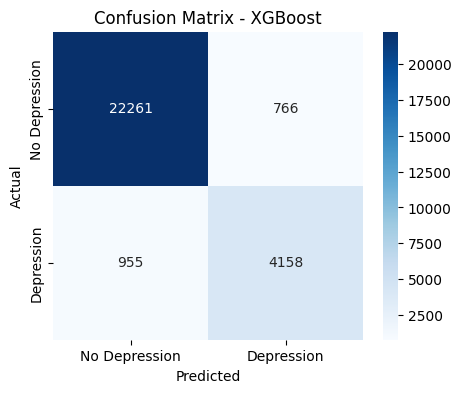

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     23027
         1.0       0.84      0.81      0.83      5113

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation data using XGBoost


# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_valid, y_pred)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Print Classification Report for XGBoost
print("Classification Report for XGBoost:\n", classification_report(y_valid, y_pred))


In [ ]:
y_test_preds = final_model.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds
})

submission.to_csv("submission17.csv", index=False)

print("Submission file saved successfully!")


             LightGBM + Optuna + Stratified K-Fold

In [69]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Function to optimize
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
    }

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    return scores.mean()  # Average accuracy

# Run Optuna with adjustable trials
n_trials = 200  # Adjust this value as needed
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=175)

best_params = study.best_params
print("Best Parameters:", best_params)
print("Best Accuracy:", study.best_value)

# Train final model with best parameters
lgbm_model = lgb.LGBMClassifier(**best_params)
lgbm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = lgbm_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Final Model Accuracy on Test Data:", accuracy)


[I 2025-03-14 12:48:32,400] A new study created in memory with name: no-name-2f8f4392-3846-4774-bd19-4e9cc087c642
[I 2025-03-14 12:48:42,125] Trial 0 finished with value: 0.9374271499644633 and parameters: {'n_estimators': 274, 'max_depth': 9, 'learning_rate': 0.1071997609485003, 'subsample': 0.726649867916999, 'colsample_bytree': 0.6336937676482689, 'reg_alpha': 3.550728414263873, 'reg_lambda': 0.9136501525109814, 'min_child_samples': 37, 'num_leaves': 142}. Best is trial 0 with value: 0.9374271499644633.
[I 2025-03-14 12:48:47,521] Trial 1 finished with value: 0.9381307746979388 and parameters: {'n_estimators': 197, 'max_depth': 8, 'learning_rate': 0.15706497843874714, 'subsample': 0.895470382456243, 'colsample_bytree': 0.6494372530987739, 'reg_alpha': 4.740588260573016, 'reg_lambda': 4.2384847741230836, 'min_child_samples': 31, 'num_leaves': 94}. Best is trial 1 with value: 0.9381307746979388.
[I 2025-03-14 12:48:54,754] Trial 2 finished with value: 0.9389765458422176 and parameters

Best Parameters: {'n_estimators': 242, 'max_depth': 4, 'learning_rate': 0.10566537388502976, 'subsample': 0.8167575863272403, 'colsample_bytree': 0.7194870411491862, 'reg_alpha': 2.0863193347542293, 'reg_lambda': 3.508614134041296, 'min_child_samples': 12, 'num_leaves': 131}
Best Accuracy: 0.9397725657427151
Final Model Accuracy on Test Data: 0.9384861407249467


In [136]:
y_test_preds_lgbm = lgbm_model.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds_lgbm
})

submission.to_csv("submission33.csv", index=False)

print("Submission file saved successfully!")

Submission file saved successfully!


             LightGBM + Optuna + Stratified k_fold + TPE sampler for more efficient hyper paramter search

In [80]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Use TPE Sampler for better efficiency
sampler = optuna.samplers.TPESampler()
study = optuna.create_study(direction="maximize", sampler=sampler)

# Function to optimize
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0, 5),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "objective": "binary",
        "metric": "binary_logloss",
    }

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    return scores.mean()  # Average accuracy

# Run Optuna with 225 refined trials
study.optimize(objective, n_trials=225)

best_params = study.best_params
print("Best Parameters:", best_params)
print("Best Accuracy:", study.best_value)

# Train final model with best parameters
lgbm_tpe_model = lgb.LGBMClassifier(**best_params)
lgbm_tpe_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = lgbm_tpe_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Final Model Accuracy on Test Data:", accuracy)

[I 2025-03-13 16:32:55,151] A new study created in memory with name: no-name-d2eff2d6-0846-483a-b9fa-56a420e00459
[I 2025-03-13 16:33:01,191] Trial 0 finished with value: 0.9390831556503197 and parameters: {'n_estimators': 304, 'max_depth': 11, 'learning_rate': 0.03767733997028384, 'subsample': 0.9934051503087166, 'colsample_bytree': 0.9553721032662966, 'lambda_l1': 3.3635730022630907, 'lambda_l2': 4.657925717713099, 'min_child_weight': 1}. Best is trial 0 with value: 0.9390831556503197.
[I 2025-03-13 16:33:05,769] Trial 1 finished with value: 0.9391613361762616 and parameters: {'n_estimators': 262, 'max_depth': 5, 'learning_rate': 0.04788924216784333, 'subsample': 0.8749874165080587, 'colsample_bytree': 0.7861047165513448, 'lambda_l1': 2.2079602527749262, 'lambda_l2': 2.6808968453006212, 'min_child_weight': 1}. Best is trial 1 with value: 0.9391613361762616.
[I 2025-03-13 16:33:09,799] Trial 2 finished with value: 0.9392395167022032 and parameters: {'n_estimators': 201, 'max_depth': 9

Best Parameters: {'n_estimators': 359, 'max_depth': 4, 'learning_rate': 0.07593324916765538, 'subsample': 0.8110527607015672, 'colsample_bytree': 0.6200802588027927, 'lambda_l1': 3.2100089573766994, 'lambda_l2': 4.981885282239955, 'min_child_weight': 1}
Best Accuracy: 0.9398294243070364
Final Model Accuracy on Test Data: 0.9386993603411514


In [132]:
y_test_preds_lgbm = lgbm_tpe_model.predict(test)

# Create submission file
submission = pd.DataFrame({
    'id': test['id'],  # Keep the ID column unchanged
    'Depression': y_test_preds_lgbm
})

# Save submission file
submission.to_csv("submission31.csv", index=False)

print("Submission file saved successfully!")

[LightGBM] [Warning] lambda_l1 is set=4.2989725185850665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2989725185850665
[LightGBM] [Warning] lambda_l2 is set=4.193656010370335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.193656010370335
Submission file saved successfully!


using SHAP for feature selection in above trained model and then train again with the selected most important features

In [ ]:
import shap


# Initialize SHAP Explainer (works with tree-based models like XGBoost & LightGBM)
explainer = shap.Explainer(lgbm_tpe_model, X_train)  

# Compute SHAP values
shap_values = explainer(X_train)

# Convert SHAP values to mean absolute values (importance ranking)
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame to show feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance': shap_importance
}).sort_values(by='SHAP Importance', ascending=False)

print(feature_importance)




100%|===================| 112464/112560 [11:19<00:00]        

                                              Feature  SHAP Importance
1                                                 Age         1.609564
16          Have you ever had suicidal thoughts ?_Yes         1.031832
13                                   Financial Stress         0.575238
5                                       Work Pressure         0.500032
8                                    Job Satisfaction         0.484467
12                                   Work/Study Hours         0.373669
3                                          Profession         0.373216
10                                     Dietary Habits         0.309502
15  Working Professional or Student_Working Profes...         0.261968
9                                      Sleep Duration         0.216591
4                                   Academic Pressure         0.196826
11                                             Degree         0.120491
2                                                City         0.096092
17    

In [ ]:
# Select only the top N most important features (e.g., top 10)
N = 18
top_features = feature_importance['Feature'].iloc[:N].tolist()

# Train a new model using only the top N features
X_train_selected = X_train[top_features]
X_valid_selected = X_valid[top_features]

lgbm_tpe_model.fit(X_train_selected, y_train)

# Evaluate the new model
y_pred = lgbm_tpe_model.predict(X_valid_selected)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Accuracy after feature selection: {accuracy}")

[LightGBM] [Warning] lambda_l1 is set=4.5483805972948534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5483805972948534
[LightGBM] [Warning] lambda_l2 is set=4.693331887833879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.693331887833879
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=4.5483805972948534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5483805972948534
[LightGBM] [Warning] lambda_l2 is set=4.693331887833879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.693331887833879
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 11

In [ ]:
# Ensure test dataset has the same features as training data
test_selected = test[top_features]  # Use only the selected 16 features

# Make predictions using the trained model
y_test_preds_lgbm = lgbm_tpe_model.predict(test_selected)

# Create submission file
submission = pd.DataFrame({
    'id': test['id'],  # Keep the ID column unchanged
    'Depression': y_test_preds_lgbm
})

# Save submission file
submission.to_csv("submission28.csv", index=False)

print("Submission file saved successfully!")


[LightGBM] [Warning] lambda_l1 is set=4.5483805972948534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5483805972948534
[LightGBM] [Warning] lambda_l2 is set=4.693331887833879, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.693331887833879
Submission file saved successfully!


           Blending LightGBM & XGBoost + optuna + strtified k-fold

In [ ]:
import optuna
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Optuna objective function for XGBoost
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(**params)
    
    scores = []
    for train_idx, val_idx in skf.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        preds = model.predict(X.iloc[val_idx])
        scores.append(accuracy_score(y.iloc[val_idx], preds))
    
    return np.mean(scores)

# Optuna objective function for LightGBM
def objective_lgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "objective": "binary",
        "metric": "binary_error",
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**params)

    scores = []
    for train_idx, val_idx in skf.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        preds = model.predict(X.iloc[val_idx])
        scores.append(accuracy_score(y.iloc[val_idx], preds))
    
    return np.mean(scores)

# Run Optuna for XGBoost
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=100)
best_params_xgb = study_xgb.best_params

# Run Optuna for LightGBM
study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=100)
best_params_lgb = study_lgb.best_params

# Train final models with best parameters
xgb_model = xgb.XGBClassifier(**best_params_xgb)
lgb_model = lgb.LGBMClassifier(**best_params_lgb)

xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# Predict probabilities
xgb_pred = xgb_model.predict_proba(X_valid)[:, 1]
lgb_pred = lgb_model.predict_proba(X_valid)[:, 1]

# **Blending: Weighted average of predictions**
final_pred = (0.6 * lgb_pred) + (0.4 * xgb_pred)
final_pred_binary = (final_pred > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_valid, final_pred_binary)
print("Blended Model Accuracy:", accuracy)


In [ ]:
# Get probability predictions from both models
y_test_preds_lgb = lgb_model.predict(test)
y_test_preds_xgb = xgb_model.predict(test)

# Blend the predictions (Average probabilities)
y_test_preds_avg = (y_test_preds_lgb + y_test_preds_xgb) / 2

# Convert averaged probabilities to binary labels
y_test_preds_binary = (y_test_preds_avg > 0.5).astype(int)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds_binary
})

submission.to_csv("submission23.csv", index=False)

print("Blended submission file saved successfully!")


With above approach didn't got much performance. so i skipped this algorithm for training the model.


        LightGBM + Optuna + repeated Stratified k_fold + TPE sampler for more efficient hyper paramter search


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Use TPE Sampler for better efficiency
sampler = optuna.samplers.TPESampler()
study = optuna.create_study(direction="maximize", sampler=sampler)

# Function to optimize
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0, 5),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 6),
        "objective": "binary",
        "metric": "binary_logloss",
    }

    # Repeated Stratified K-Fold setup (2 repeats for efficiency)
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    
    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X, y, cv=rskf, scoring="accuracy", n_jobs=-1)

    return scores.mean()  # Average accuracy

# Run Optuna with 100 refined trials first (increase later if needed)
study.optimize(objective, n_trials=150)

best_params = study.best_params
print("Best Parameters:", best_params)
print("Best Accuracy:", study.best_value)

# Train final model with best parameters
lgbm_tpe_model2 = lgb.LGBMClassifier(**best_params)
lgbm_tpe_model2.fit(X_train, y_train)

# Evaluate on test set
y_pred = lgbm_tpe_model2.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Final Model Accuracy on Test Data:", accuracy)


In [ ]:
y_test_preds_lgbm = lgbm_tpe_model2.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds_lgbm
})

submission.to_csv("submission24.csv", index=False)

print("Submission file saved successfully!")

                  Catboost + Optuna + Stratified k-fold + TPE sampler 

In [131]:
import optuna
import catboost as cb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Use TPE Sampler for better efficiency
sampler = optuna.samplers.TPESampler()
study = optuna.create_study(direction="maximize", sampler=sampler)

# Function to optimize
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 400),
        "depth": trial.suggest_int("depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "random_strength": trial.suggest_float("random_strength", 0, 2),
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "verbose": 0
    }
    
    # Stratified K-Fold Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = cb.CatBoostClassifier(**params)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    return scores.mean()  # Average accuracy

# Run Optuna with 150 trials
study.optimize(objective, n_trials=150)

best_params = study.best_params
print("Best Parameters:", best_params)
print("Best Accuracy:", study.best_value)

# Train final model with best parameters
catboost_model = cb.CatBoostClassifier(**best_params)
catboost_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = catboost_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Final Model Accuracy on Test Data:", accuracy)


[I 2025-03-06 22:38:58,483] A new study created in memory with name: no-name-5fb8c28b-233c-41e3-8fa9-f54a5ce01c4b
[I 2025-03-06 22:39:27,374] Trial 0 finished with value: 0.9366879886282872 and parameters: {'iterations': 311, 'depth': 9, 'learning_rate': 0.1758954393640129, 'l2_leaf_reg': 7.289266449034544, 'border_count': 188, 'bagging_temperature': 0.8880920389310848, 'random_strength': 0.3342330870598458}. Best is trial 0 with value: 0.9366879886282872.
[I 2025-03-06 22:39:48,694] Trial 1 finished with value: 0.9391684434968017 and parameters: {'iterations': 139, 'depth': 11, 'learning_rate': 0.09541619024106723, 'l2_leaf_reg': 5.099050887546924, 'border_count': 223, 'bagging_temperature': 0.818882760856749, 'random_strength': 0.46020271058515294}. Best is trial 1 with value: 0.9391684434968017.
[I 2025-03-06 22:39:57,432] Trial 2 finished with value: 0.9393532338308457 and parameters: {'iterations': 158, 'depth': 8, 'learning_rate': 0.13963490211055604, 'l2_leaf_reg': 3.85324402591

KeyboardInterrupt: 

In [ ]:
y_test_preds_lgbm = catboost_model.predict(test)

submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds_lgbm
})

submission.to_csv("submission25.csv", index=False)

print("Submission file saved successfully!")

Submission file saved successfully!


In [95]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define SVM pipeline with feature scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('svm', SVC(kernel='linear'))  # SVM with Linear Kernel
])

# Define parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10, 100]  # Regularization strength
}

# Perform Grid Search with 5-Fold Cross Validation
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model from GridSearchCV
best_svm_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on validation set
y_valid_preds_svm = best_svm_model.predict(X_valid)

# Compute validation accuracy
svm_valid_acc = accuracy_score(y_valid, y_valid_preds_svm)
print(f"SVM Validation Accuracy: {svm_valid_acc:.5f}")




Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'svm__C': 1}
SVM Validation Accuracy: 0.93728


In [97]:
# Predict on test data
y_test_preds_svm = best_svm_model.predict(test)

# Create submission file
submission = pd.DataFrame({
    'id': test['id'],   
    'Depression': y_test_preds_svm
})

submission.to_csv("submission29_svm.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


above all the algoriths    LightGBM + Optuna + Stratified K-Fold algorithm had the most hoghest accuracy score on the test data. 